In [57]:
from pgf import stehfest
from pgf import papoulis
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import math

In [58]:
### Constantes cineticas ###

kd = 1.5e-05
kp = 7.594e02
ktrs = 3.31e-02
ktrm = 1.78e-02
kt = 3.45e07
ktc = 0.7 * kt
ktd = 0.3 *kt

f = 0.3
epsilon = -0.11

iniciador_0 = 0.15 #0.01508
monomero_0 = 4.32
solvente_0 = 4.91

vol_inicial = 1

In [59]:
### Modelo de polimerización por radicales libres #

def balances(t, y, z):

  #assing
  VI = y[0]   #iniciador * volumen
  VM = y[1]   #monomero * volumen
  VS = y[2]   #solvente * volumen
  VY0 = y[3]  #momento cero para radicales * volumen
  VM0 = y[4]  #momento cero para polimero muerto * volumen
  V = y[5]    #volumen
  Y0P = y[6]  #momento cero para radicales * pgf de radicales
  M0F = y[7]  #momento cero para polimero * pgf de polimero muerto

  dydt0 = - kd * VI
  dydt1 = - ( 2 * f * kd * VI + (kp + ktrm) * VM * (VY0 / V) )
  dydt2 = - ktrs * VS * (VY0 / V)
  dydt3 = 2 * f * kd * VI - kt * VY0 * (VY0 / V)
  dydt4 = ( ktrs * (VS / V) + ktrm * (VM / V) * ktd * (VY0 / V)) * VY0 + (ktc/2) * VY0 * (VY0 / V)
  dydt5 = ( epsilon * (2 * f * kd * VI + (kp + ktrm) * VM * (VY0/V)) ) / monomero_0
  dydt6 = ( 2 * f * kd * VI * z +
            (ktrs * VS + ktrm * VM) * (VY0 / V) * z -
            (kp * VM * (1-z) + ktrs * VS  + ktrm * VM + kt * VY0 ) * Y0P - Y0P * dydt5 ) * (V**-1)
  dydt7 = ((ktrs * VS + ktrm * VM + ktd * VY0) * Y0P + (ktc/2) * V * (Y0P)**2 - M0F * dydt5) * V**-1


  return (dydt0, dydt1, dydt2, dydt3, dydt4, dydt5, dydt6, dydt7)

In [60]:
### Condiciones iniciales ###

y0_0 = [
      iniciador_0, #concentracion inicial iniciador
      monomero_0,  #concentracion inicial monomero
      solvente_0,  #concentracion inicial solvente
      0,           #momento cero para radicales * volumen
      0,           #momento cero para polimero muerto * volumen
      vol_inicial, #volumen inicial
      0,           #momento cero para radicales * pgf de radicales
      0            #momento cero para polimero * pgf de polimero muerto
      ]


def transformada(z,t):
    y0 = y0_0 #condición inicial
    time_range = [0, t]
    t_get = [t]
    z_args = z
    sol = solve_ivp(
      balances,
      time_range, 
      y0, 
      t_eval = t_get, 
      method='LSODA', 
      args = (z_args,),
      rtol = 1e-10, 
      atol=1e-12
      )
    return sol.y

In [61]:
DP = np.linspace(2, 10000, 100)# largo de la cadena

sft_0 = stehfest(8, DP, 1, transformada, 7)
sft_1 = stehfest(8, DP, 10, transformada, 7)
sft_2 = stehfest(8, DP, 20, transformada, 7)



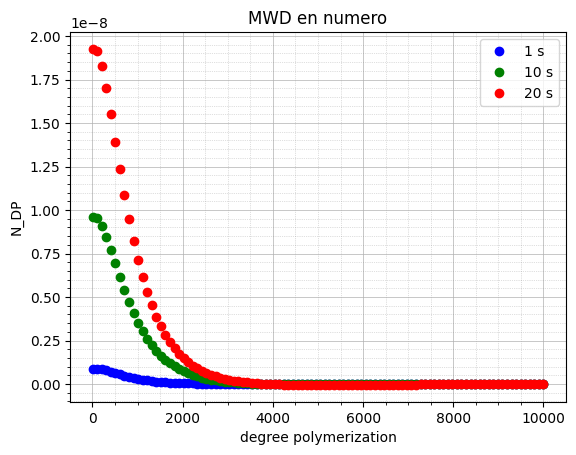

In [62]:
plt.plot(DP, sft_0, 'bo', label='1 s')
plt.plot(DP, sft_1, 'go', label='10 s')
plt.plot(DP, sft_2, 'ro', label='20 s')

plt.xlabel('degree polymerization')
plt.ylabel('N_DP')
plt.title('MWD en numero')
plt.legend()
plt.grid(True)
plt.grid(which='both', axis='both', linestyle='-', linewidth=0.5)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray', alpha=0.5)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

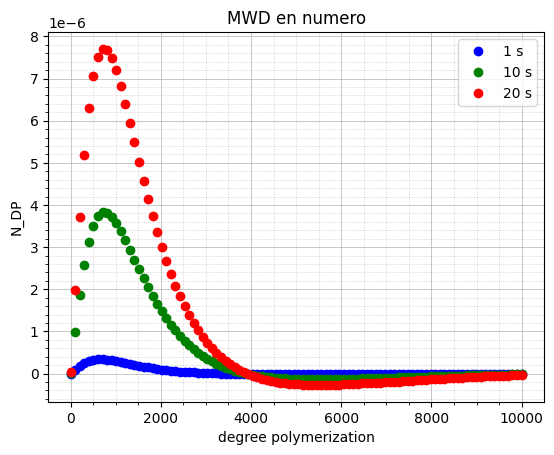

In [63]:
sft_0_flat = np.concatenate(sft_0)
sft_1_flat = np.concatenate(sft_1)
sft_2_flat = np.concatenate(sft_2)

# Multiplicación de cada elemento de sft_0 por el elemento correspondiente de DP
sft_0_DP = np.multiply(sft_0_flat, DP)
sft_1_DP = np.multiply(sft_1_flat, DP)
sft_2_DP = np.multiply(sft_2_flat, DP)

plt.plot(DP, sft_0_DP, 'bo', label='1 s')
plt.plot(DP, sft_1_DP, 'go', label='10 s')
plt.plot(DP, sft_2_DP, 'ro', label='20 s')

plt.xlabel('degree polymerization')
plt.ylabel('N_DP')
plt.title('MWD en numero')
plt.legend()
plt.grid(True)
plt.grid(which='both', axis='both', linestyle='-', linewidth=0.5)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray', alpha=0.5)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

In [64]:
inicio_dp = 10
final_dp = 10000

DP_paps = range(inicio_dp, final_dp)

paps_0 = papoulis(inicio_dp, final_dp, 2, 8, 1, transformada, 7)
paps_1 = papoulis(inicio_dp, final_dp, 2, 6, 10, transformada, 7)
paps_2 = papoulis(inicio_dp, final_dp, 2, 6, 20, transformada, 7)


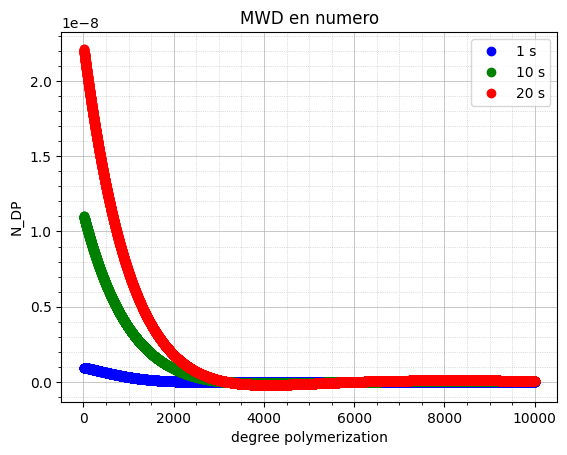

In [65]:
plt.plot(DP_paps, paps_0, 'ob', label='1 s')
plt.plot(DP_paps, paps_1, 'og', label='10 s')
plt.plot(DP_paps, paps_2, 'or', label='20 s')

plt.xlabel('degree polymerization')
plt.ylabel('N_DP')
plt.title('MWD en numero')
plt.legend()
plt.grid(True)
plt.grid(which='both', axis='both', linestyle='-', linewidth=0.5)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray', alpha=0.5)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

In [66]:
solver = solve_ivp(
    balances,
    [0, 3600*30], 
    y0_0, 
    method='LSODA', 
    args = (0.8,),
    rtol = 1e-10, 
    atol=1e-12
    )

Text(0, 0.5, '[M]')

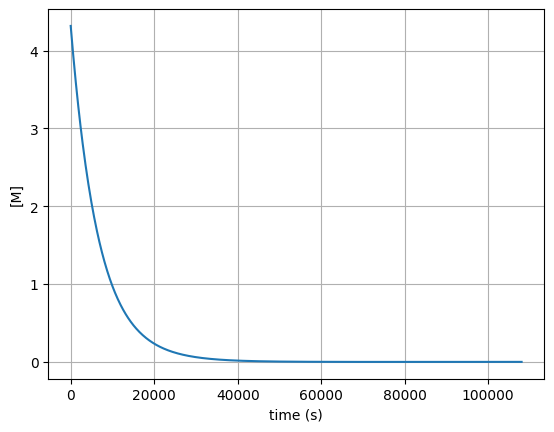

In [68]:
plt.plot(solver.t, solver.y[1])
plt.grid()
plt.xlabel('time (s)')
plt.ylabel('[M]')

Text(0, 0.5, '[M]')

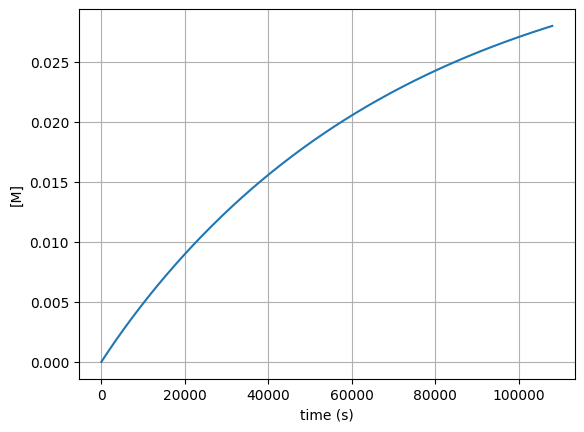

In [70]:
plt.plot(solver.t, solver.y[4])
plt.grid()
plt.xlabel('time (s)')
plt.ylabel('[M]')

In [83]:
DP = np.linspace(10, 10000, 100)# largo de la cadena

sft_01 = stehfest(10, DP, 10000, transformada, 7)
sft_02 = stehfest(10, DP, 40000, transformada, 7)
sft_03 = stehfest(10, DP, 80000, transformada, 7)

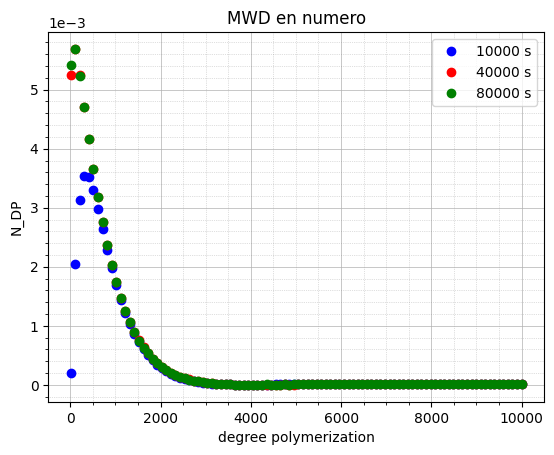

In [84]:
sft_01_flat = np.concatenate(sft_01)
sft_02_flat = np.concatenate(sft_02)
sft_03_flat = np.concatenate(sft_03)


# Multiplicación de cada elemento de sft_0 por el elemento correspondiente de DP
sft_01_DP = np.multiply(sft_01_flat, DP)
sft_02_DP = np.multiply(sft_02_flat, DP)
sft_03_DP = np.multiply(sft_03_flat, DP)

plt.plot(DP, sft_01_DP, 'bo', label='10000 s')
plt.plot(DP, sft_02_DP, 'ro', label='40000 s')
plt.plot(DP, sft_03_DP, 'go', label='80000 s')

plt.xlabel('degree polymerization')
plt.ylabel('N_DP')
plt.title('MWD en numero')
plt.legend()
plt.grid(True)
plt.grid(which='both', axis='both', linestyle='-', linewidth=0.5)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray', alpha=0.5)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))